In [868]:
import numpy as np
import timeit
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.optimize import minimize
from scipy.optimize import approx_fprime
from scipy.optimize import newton
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import decimal
import asteval
from lmfit import Model
from lmfit import Parameters
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import math

In [869]:
#decorator for logging function calls

def call_counter(func):
    def helper(*args, **kwargs):
        helper.calls += 1
        return func(*args, **kwargs)
    helper.calls = 0
    helper.__name__= func.__name__

    return helper


In [870]:
def mserror(predicted,y):
    return np.sum((predicted-y)**2)

In [871]:
def olserror(a_b,*params):
    x = params[0]
    y = params[1]
    func = params[2]
    return 1/len(x)*np.sum((func(x,a_b[0],a_b[1])-y)**2)

In [897]:
alpha = np.random.random()
betha = np.random.random()
x = np.array([i/100 for i in range(101)])
y = np.array([alpha*x_i + betha + np.random.normal(loc=0.0, scale=1.0) for x_i in x]) 

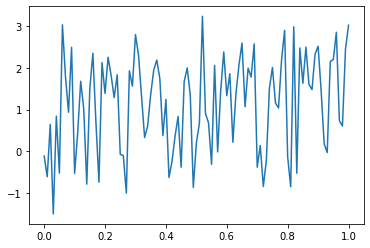

In [898]:
plt.plot(x,y)

In [899]:
#define functions for approximation
def func1(x,a,b):
    return a*x+b


def func2(x,a,b):
    return a/(1+b*x)

<h1>Gradient Descent</h1>

In [900]:
def jacobian(loss,func,x,y,params):
    a_b = np.array(params)
    args = (x,y,func)
    res = approx_fprime(a_b, loss, 0.001, *args)
    return res
    

In [901]:
def gradient_descent(x,y,params,func,lr=0.001,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    func.calls=0
    m = len(y)
    cost_history = np.zeros(iterations)
    param_history = np.zeros((iterations,2))
    params = np.array(params)
    for it in range(iterations):
        predictions = func(x,*params)
        #grad = np.array((1/m)*np.sum(predictions-y),((1/m)*np.sum((predictions-y)*x)))
        grad = jacobian(olserror,func,x,y,params)
        params = params - lr*grad    
        cost = olserror(params,x,y,func)
        cost_history[it] = cost
    print("Function called ",func.calls," times" )
    func.calls=0
    return params, cost_history

Function called  0  times
a:          0.839,
b:          0.723


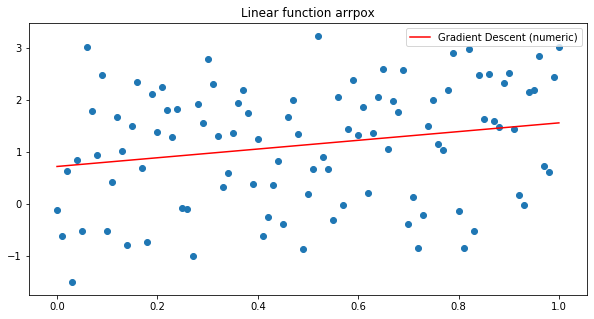

In [902]:
#Compute for linear function 
lr =0.01
n_iter = 1000
x = np.array(x).reshape(len(x),-1)
y = np.array(y).reshape(len(y),-1)
a_b = np.array([0.5,0.5])

a_b,cost_history = gradient_descent(x,y,a_b,func1,lr,n_iter)
print('a:          {:0.3f},\nb:          {:0.3f}'.format(a_b[0],a_b[1]))
estimates1_grad=func1(x,*a_b)
plt.figure(figsize=(10,5))
plt.scatter(np.ravel(x), np.ravel(y))
plt.plot(np.ravel(x), np.ravel(estimates1_grad), label="Gradient Descent (numeric)",color='red')
plt.title("Linear function arrpox")
plt.legend()


In [903]:
print(mserror(func1(x,*a_b),y))

124.57633913027438


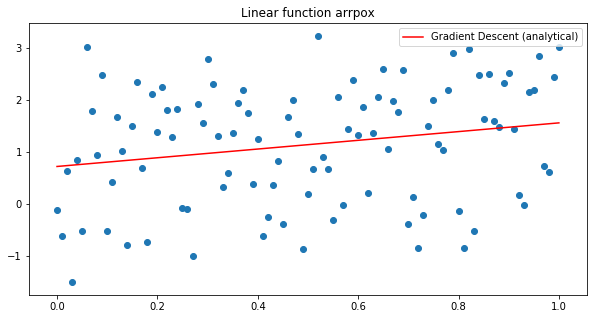

In [904]:
plt.figure(figsize=(10,5))
plt.scatter(np.ravel(x), np.ravel(y))
plt.plot(np.ravel(x), np.ravel(estimates1_grad), label="Gradient Descent (analytical)",color='red')
plt.title("Linear function arrpox")
plt.legend()

Function called  0  times
a:          0.789,
b:          -0.547


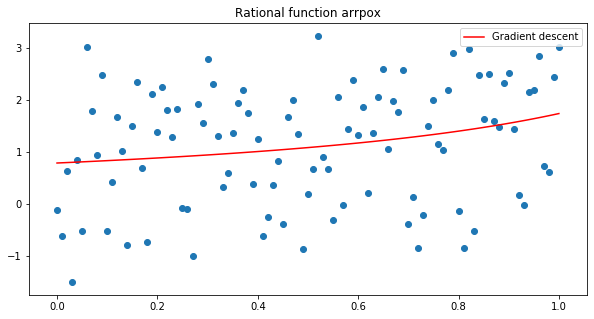

In [905]:
lr =0.01
n_iter = 1000
x = np.array(x).reshape(len(x),-1)
y = np.array(y).reshape(len(y),-1)
a_b = np.array([0.5,0.5])
a_b,cost_history = gradient_descent(x,y,a_b,func2,lr,n_iter)
print('a:          {:0.3f},\nb:          {:0.3f}'.format(a_b[0],a_b[1]))
estimates2_grad=func2(x,*a_b)
plt.figure(figsize=(10,5))
plt.scatter(np.ravel(x), np.ravel(y))
plt.plot(np.ravel(x), np.ravel(estimates2_grad), label="Gradient descent", color="red")
plt.title("Rational function arrpox")
plt.legend()


In [906]:
mserror(func2(x,*a_b),y)

124.17637493943893

<h1>Newton</h1>

In [907]:
def jacobian1(params,x,y,func):
    loss = olserror
    a_b = params
    args = (x,y,func)
    res = approx_fprime(a_b, loss, 0.001, *args)
    return res

In [908]:
def hess(params,x,y,func):
    return 2*params[0]

In [909]:
def newtons_method(x0, x, y, func, eps=0.001):
    res = minimize(olserror, x0, args=(x, y,func), tol=eps, method='Newton-CG',
                             jac=jacobian1,hess=hess, options={'disp': True})
    print(res)
    return res

In [910]:
res_newton1 = newtons_method(np.array([0.5,0.5]),x,y, func1)

Optimization terminated successfully.
         Current function value: 1.233142
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 38
         Hessian evaluations: 17
     fun: 1.2331416702578208
     jac: array([-0.00231339,  0.00062778])
 message: 'Optimization terminated successfully.'
    nfev: 22
    nhev: 17
     nit: 17
    njev: 38
  status: 0
 success: True
       x: array([0.88487979, 0.69801569])


124.5473086960399


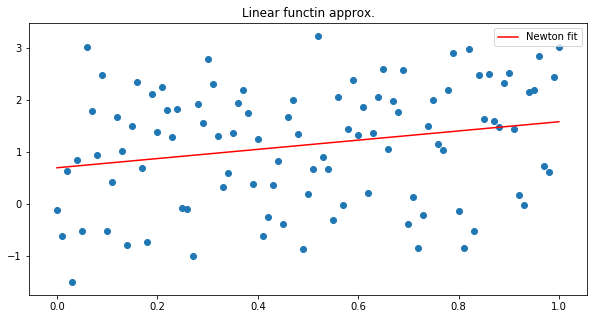

In [911]:
estimates_newton1=func1(x,*res_newton1.x)
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.title("Linear functin approx.")
plt.plot(x, estimates_newton1, 'r-',color='red', label='Newton fit')
plt.legend()
print(mserror(func1(x,*res_newton1.x),y))

Optimization terminated successfully.
         Current function value: 1.229373
         Iterations: 22
         Function evaluations: 30
         Gradient evaluations: 51
         Hessian evaluations: 22
     fun: 1.2293730535713692
     jac: array([0.0001476 , 0.00782089])
 message: 'Optimization terminated successfully.'
    nfev: 30
    nhev: 22
     nit: 22
    njev: 51
  status: 0
 success: True
       x: array([ 0.77851421, -0.55740725])
124.16667841070829


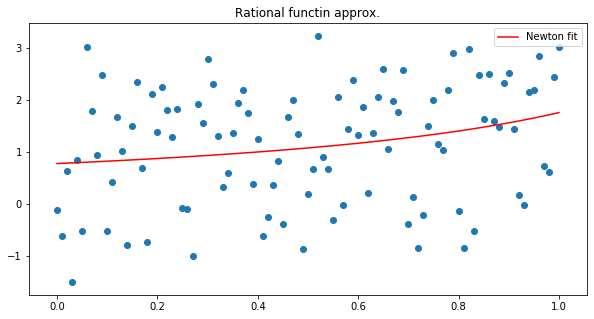

In [912]:
res_newton2 = newtons_method(np.array([0.5,0.5]),x,y, func2)
estimates_newton2=func2(x,*res_newton2.x)
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.title("Rational functin approx.")
plt.plot(x, estimates_newton2, 'r-',color='red', label='Newton fit')
plt.legend()
print(mserror(func2(x,*res_newton2.x),y))

<h1>Conjugate gradient descent</h1>

In [913]:
def conjugate_descent(x0, x, y, func, eps=0.001):
    res = minimize(olserror, x0, args=(x, y,func), tol=eps, method='CG', options={'disp': True})
    print(res)
    return res

Optimization terminated successfully.
         Current function value: 1.233127
         Iterations: 5
         Function evaluations: 44
         Gradient evaluations: 11
     fun: 1.2331269033190808
     jac: array([ 4.02331352e-07, -9.68575478e-07])
 message: 'Optimization terminated successfully.'
    nfev: 44
     nit: 5
    njev: 11
  status: 0
 success: True
       x: array([0.89805982, 0.69131198])
124.54581723522716


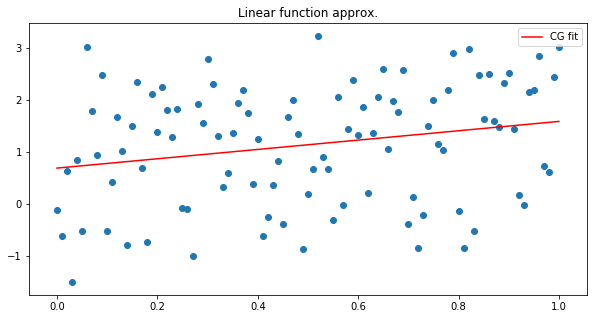

In [914]:
res_cg1 = conjugate_descent(np.array([0.5,0.5]),x,y, func1)
estimates_cg1=func1(x,*res_cg1.x)
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.plot(x, estimates_cg1, 'r-',color='red', label='CG fit')
plt.legend()
plt.title("Linear function approx.")
print(mserror(func1(x,*res_cg1.x),y))

Optimization terminated successfully.
         Current function value: 1.229370
         Iterations: 7
         Function evaluations: 68
         Gradient evaluations: 17
     fun: 1.229370331522948
     jac: array([-0.00065368, -0.00051443])
 message: 'Optimization terminated successfully.'
    nfev: 68
     nit: 7
    njev: 17
  status: 0
 success: True
       x: array([ 0.77503462, -0.5606762 ])
Least squares error:  124.16640348381776


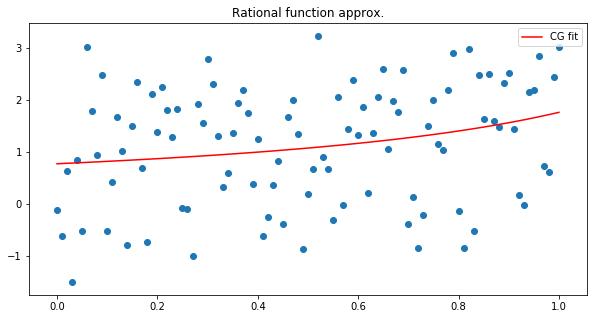

In [915]:
res_cg2 = conjugate_descent(np.array([0.5,0.5]),x,y, func2)
estimates_cg2=func2(x,*res_cg2.x)
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.plot(x, estimates_cg2, 'r-',color='red', label='CG fit')
plt.legend()
plt.title("Rational function approx.")
print("Least squares error: ",mserror(func2(x,*res_cg2.x),y))

<h1>Levenberg-Marquardt</h1>

In [916]:
f1model = Model(func1)
print('parameter names: {}'.format(f1model.param_names))
print('independent variables: {}'.format(f1model.independent_vars))
params1 = Parameters()
params1.add('a', value=0, min=-2, max=2)
params1.add('b', value=0, min=-2, max=2)
result1_levenberg = f1model.fit(y, params1, x=x, method="leastsq")

parameter names: ['a', 'b']
independent variables: ['x']


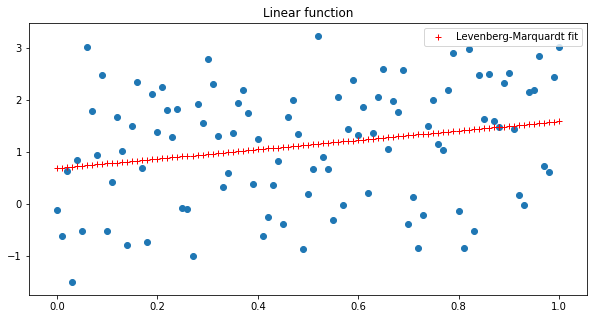

124.54581723497628


In [917]:
plt.figure(figsize=(10,5))
plt.scatter(x, y,)
plt.plot(x, result1_levenberg.best_fit, '+', color='red', label='Levenberg-Marquardt fit')
plt.title("Linear function")
plt.legend(loc='best')
plt.show()
print(mserror(result1_levenberg.best_fit,y))
result1_levenberg

In [918]:
f2model = Model(func2)
print('parameter names: {}'.format(f1model.param_names))
print('independent variables: {}'.format(f1model.independent_vars))
params2 = Parameters()
params2.add('a', value=0, min=-1, max=1)
params2.add('b', value=0, min=-1, max=1)
result2_levenberg = f2model.fit(y, params2, x=x, method="leastsq")

parameter names: ['a', 'b']
independent variables: ['x']


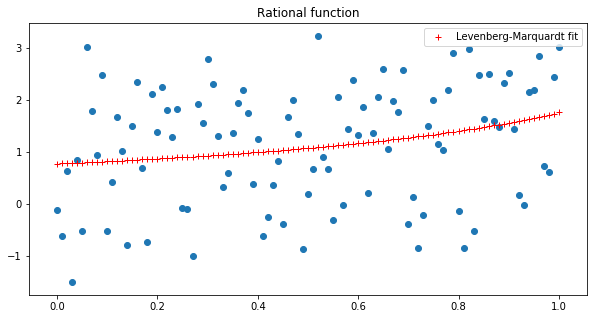

124.16634432256278


In [919]:
plt.figure(figsize=(10,5))
plt.scatter(x, y,)
plt.plot(x, result2_levenberg.best_fit, '+', color='red', label='Levenberg-Marquardt fit')
plt.title("Rational function")
plt.legend(loc='best')
plt.show()
print(mserror(result2_levenberg.best_fit,y))
result2_levenberg

<h1>Approximant Comparison</h1>

124.5473086960399


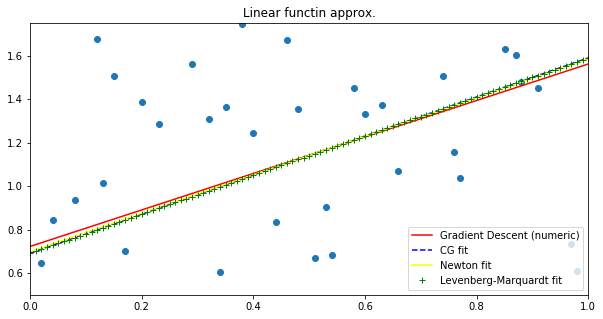

In [937]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

ax.axis([0,1,0.5,1.75])
ax.scatter(x, y)
plt.title("Linear functin approx.")
ax.plot(np.ravel(x), np.ravel(estimates1_grad), label="Gradient Descent (numeric)",color='red')
ax.plot(x, estimates_cg1, 'r--',color='blue', label='CG fit')
ax.plot(x, estimates_newton1, 'r-',color='yellow', label='Newton fit')
ax.plot(x, result1_levenberg.best_fit, '+', color='green', label='Levenberg-Marquardt fit')


ax.legend()
print(mserror(func1(x,*res_newton1.x),y))

124.5473086960399


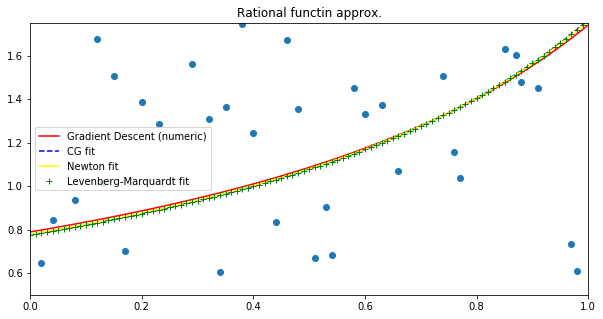

In [941]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

ax.axis([0,1,0.5,1.75])
ax.scatter(x, y)
plt.title("Rational functin approx.")
ax.plot(np.ravel(x), np.ravel(estimates2_grad), label="Gradient Descent (numeric)",color='red')
ax.plot(x, estimates_cg2, 'r--',color='blue', label='CG fit')
ax.plot(x, estimates_newton2, 'r-',color='yellow', label='Newton fit')
ax.plot(x, result2_levenberg.best_fit, '+', color='green', label='Levenberg-Marquardt fit')


ax.legend()
print(mserror(func1(x,*res_newton1.x),y))